<a href="https://colab.research.google.com/github/jeno1990/Colab-Projects/blob/main/Linear_regression_with_full_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error , mean_absolute_error, r2_score
from sklearn.preprocessing import LabelEncoder,StandardScaler, MinMaxScaler

In [5]:
path = "/content/drive/MyDrive/Colab/Housing.csv" #read data from drive
data = pd.read_csv(path)
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [6]:
# remove unused columns
# columns_to_keep = ['area', 'bedrooms', 'bathrooms', 'hotwaterheating', 'airconditioning', 'price']
# data = data[columns_to_keep]
# data.head()

In [7]:
data.info() # Provides a concise summary of the DataFram

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [8]:
data.describe() # Provides descriptive statistics for numeric columns in the DataFrame

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [9]:
missing_values = data.isnull().sum() # to see if there are any null values in the data set
print(missing_values)

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64


In [10]:
#This will fill the missing values with midian of the other values if exist.
for column in data.select_dtypes(include=['float64', 'int64']).columns:
    if data[column].isnull().sum() > 0:
        median_value = data[column].median()
        data[column].fillna(median_value, inplace=True)

In [11]:
unique_values = data['furnishingstatus'].unique()
print(unique_values)

['furnished' 'semi-furnished' 'unfurnished']


In [12]:
# Label encoding categorical variables 'hotwaterheating' and 'airconditioning' to convert them into numerical values
label_encoder = LabelEncoder()

data['hotwaterheating'] = label_encoder.fit_transform(data['hotwaterheating'])
data['airconditioning'] = label_encoder.fit_transform(data['airconditioning'])
data['furnishingstatus'] = label_encoder.fit_transform(data['furnishingstatus'])
data['mainroad'] = label_encoder.fit_transform(data['mainroad'])
data['guestroom'] = label_encoder.fit_transform(data['guestroom'])
data['basement'] = label_encoder.fit_transform(data['basement'])
data['prefarea'] = label_encoder.fit_transform(data['prefarea'])

print(data)

        price  area  bedrooms  bathrooms  stories  mainroad  guestroom  \
0    13300000  7420         4          2        3         1          0   
1    12250000  8960         4          4        4         1          0   
2    12250000  9960         3          2        2         1          0   
3    12215000  7500         4          2        2         1          0   
4    11410000  7420         4          1        2         1          1   
..        ...   ...       ...        ...      ...       ...        ...   
540   1820000  3000         2          1        1         1          0   
541   1767150  2400         3          1        1         0          0   
542   1750000  3620         2          1        1         1          0   
543   1750000  2910         3          1        1         0          0   
544   1750000  3850         3          1        2         1          0   

     basement  hotwaterheating  airconditioning  parking  prefarea  \
0           0                0           

In [34]:
# Separate features and target variable
X = data.drop('price', axis=1)
y = data['price']

# Standardization
scaler = StandardScaler()
# scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
# Convert scaled features back to DataFrame
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)


# Display the scaled features
print(X_scaled_df , y)

(545, 12)
         area  bedrooms  bathrooms   stories  mainroad  guestroom  basement  \
0    1.046726  1.403419   1.421812  1.378217  0.405623  -0.465315 -0.734539   
1    1.757010  1.403419   5.405809  2.532024  0.405623  -0.465315 -0.734539   
2    2.218232  0.047278   1.421812  0.224410  0.405623  -0.465315  1.361397   
3    1.083624  1.403419   1.421812  0.224410  0.405623  -0.465315  1.361397   
4    1.046726  1.403419  -0.570187  0.224410  0.405623   2.149083  1.361397   
..        ...       ...        ...       ...       ...        ...       ...   
540 -0.991879 -1.308863  -0.570187 -0.929397  0.405623  -0.465315  1.361397   
541 -1.268613  0.047278  -0.570187 -0.929397 -2.465344  -0.465315 -0.734539   
542 -0.705921 -1.308863  -0.570187 -0.929397  0.405623  -0.465315 -0.734539   
543 -1.033389  0.047278  -0.570187 -0.929397 -2.465344  -0.465315 -0.734539   
544 -0.599839  0.047278  -0.570187  0.224410  0.405623  -0.465315 -0.734539   

     hotwaterheating  airconditioning   p

12


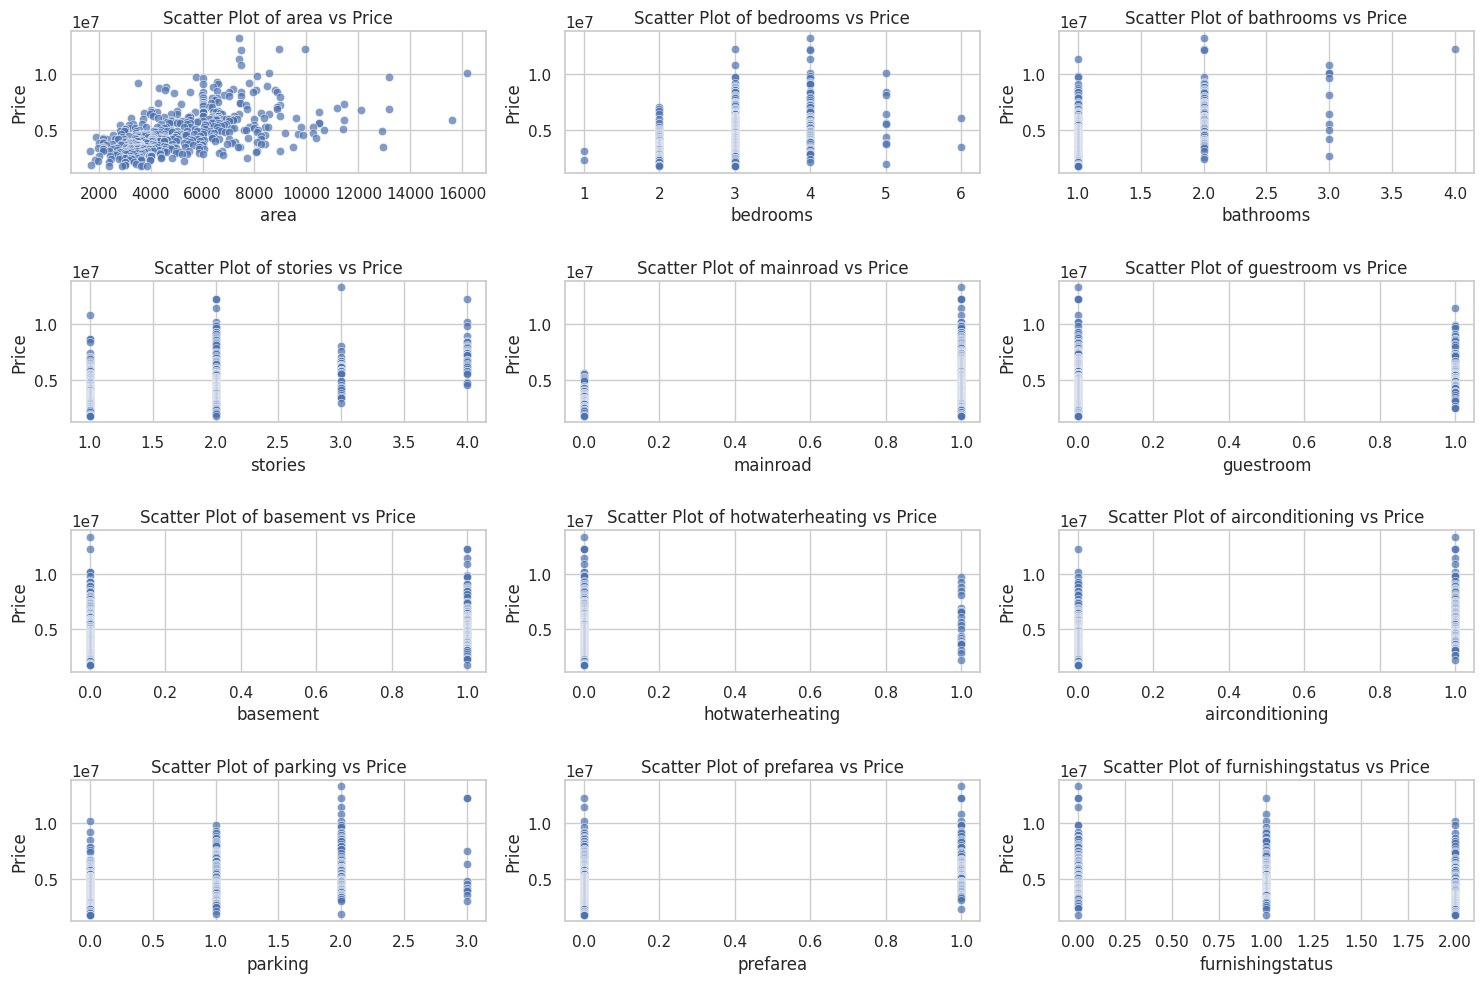

In [28]:
# Set the style of seaborn
sns.set(style='whitegrid')

features = X.columns.tolist()

print(len(features))
plt.figure(figsize=(15, 10))

for i, feature in enumerate(features):
    plt.subplot(4, 3, i + 1)
    sns.scatterplot(data=data, x=feature, y='price', alpha=0.7)
    plt.title(f'Scatter Plot of {feature} vs Price')
    plt.xlabel(feature)
    plt.ylabel('Price')
plt.tight_layout()
plt.show()


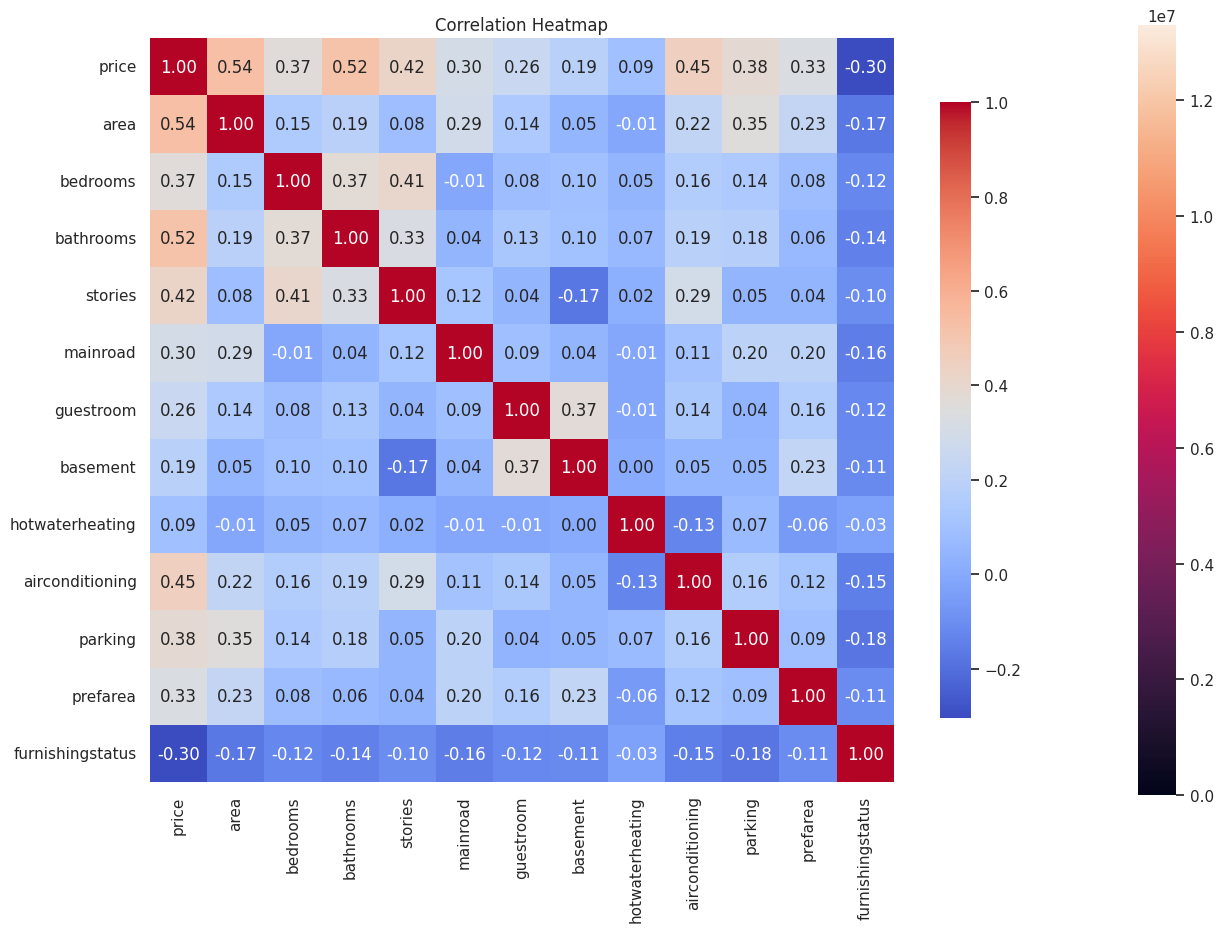

In [29]:
# Calculate the correlation matrix
correlation_matrix = data.corr()

# Set up the matplotlib figure
plt.figure(figsize=(15, 10))
sns.heatmap(data)
# Draw the heatmap
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True, cbar_kws={"shrink": .8})

# Set titles and labels
plt.title('Correlation Heatmap')
plt.show()

In [35]:
# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled_df, y, test_size=0.2, random_state=42)

(436, 12)


In [45]:
# The linear regresion model implemeted with Normal Function
class LinearRegressionFromScratch:
    def __init__(self):
        self.theta = None  # Model parameters

    def fit(self, X, y):
        # Add a column of ones to X for the intercept term (bias)
        X_b = np.c_[np.ones((X.shape[0], 1)), X]
        '''
        // This term is used for reguralization
        I = np.eye(X.shape[1]+1)
        lambda_reg = 0.1
        I[0,0] = 0
        How to use it:
        regularization_term = (lambda_reg * I)
        X_b_inverse = np.linalg.inv(X_b.T.dot(X_b) + regularization_term)
        '''

        # Calculate theta using the Normal Equation
        X_b_inverse = np.linalg.inv(X_b.T.dot(X_b))
        self.theta = X_b_inverse.dot(X_b.T).dot(y)

    def predict(self, X):
        print(self.theta)
        # Add a column of ones to X for the intercept term (bias)
        X_b = np.c_[np.ones((X.shape[0], 1)), X]
        return X_b.dot(self.theta)


model = LinearRegressionFromScratch()

# Fit the model to the training data
model.fit(X_train, y_train)

y_pred = model.predict(X_train)
r2 = r2_score(y_train, y_pred)
print(r2)


[4738612.1628707   511355.31486431   57939.76418471  550762.10873532
  352072.08634443  127770.25363585   89178.00794209  187581.88438844
  143909.24149324  365086.93393877  194330.06533066  267023.36435044
 -160043.58443798]
0.6854429472843788


In [39]:
# Predict on the test data
y_pred = model.predict(X_test)

# Calculate MSE
mse = mean_squared_error(y_test, y_pred)

# Calculate R² Score
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}\n")
print(f"R^2 Score: {r2}")

Mean Squared Error (MSE): 1771751116594.0396

R^2 Score: 0.6494754192267795


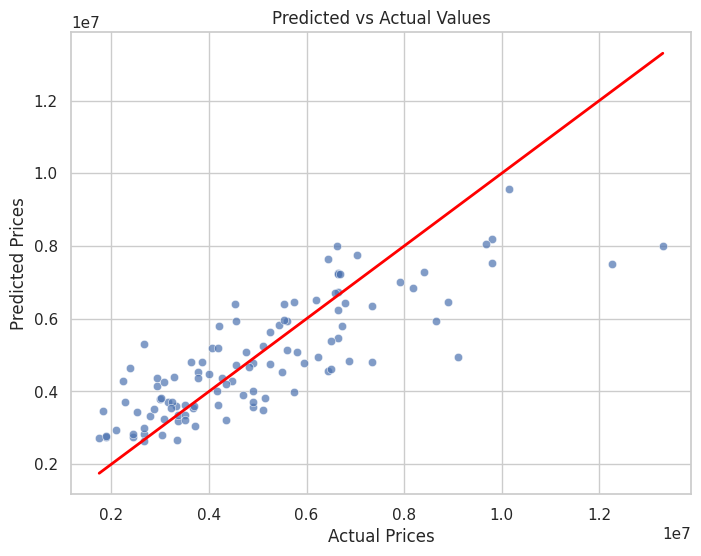

In [20]:
# Scatter plot for predicted vs actual values
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=2)  # Diagonal line y = x
plt.title("Predicted vs Actual Values")
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.show()